## Bài toán
- Thu thập dữ liệu tỷ giá từ 1/11/2023 -> đến hôm nay
- Vẽ biểu đồ của ngoại tệ USD theo thời gian

#### Dữ liệu tỷ giá từ Vietcombank
link : https://www.vietcombank.com.vn/vi-VN/KHCN/Cong-cu-Tien-ich/Ty-gia

## 1. Lấy dữ liệu thô về notebook

Database VCB chứa tỷ giá <-> API <-> response <-> Web tỷ giá (vẽ ra cái bảng từ response cho user xem)

API: https://www.vietcombank.com.vn/api/exchangerates?date=2023-11-05

## 1. Lấy dữ liệu thô về notebook

Database VCB chứa tỷ giá <-> API <-> response <-> Web tỷ giá (vẽ ra cái bảng từ response cho user xem)

API: https://www.vietcombank.com.vn/api/exchangerates?date=2023-11-05

In [1]:
import requests
import json

import pandas as pd

In [2]:
url = 'https://www.vietcombank.com.vn/api/exchangerates?date=2024-05-11'

In [3]:
r = requests.get(url)

In [4]:
# type r is Response object
type(r)

requests.models.Response

In [5]:
r.text

'{"Count":20,"Date":"2024-05-11T00:00:00","UpdatedDate":"2024-05-11T23:00:00+07:00","Data":[{"currencyName":"US DOLLAR","currencyCode":"USD","cash":"25154.00","transfer":"25184.00","sell":"25484.00","icon":"/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_usa.svg?h=32&w=32&ts=20230610195953&hash=4576D9B7C910424CC72B7A592BA369AE"},{"currencyName":"EURO","currencyCode":"EUR","cash":"26739.75","transfer":"27009.85","sell":"28205.84","icon":"/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_eur.svg?h=32&w=32&ts=20230610195955&hash=10502813C2316A5601FD57F7A0C89A3A"},{"currencyName":"UK POUND STERLING","currencyCode":"GBP","cash":"31079.41","transfer":"31393.35","sell":"32400.37","icon":"/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_gbp.svg?h=32&w=32&ts=20230610195950&hash=72ED63A02E20F8B413E65DE9B7F062AE"},{"currencyName":"JAPANESE YEN","currencyCode":"JPY","cash":"158.55","transfer":"160.16","sell":"167.81","icon":"/-/media/Default-Website/Default-Images/

In [6]:
r.json()

{'Count': 20,
 'Date': '2024-05-11T00:00:00',
 'UpdatedDate': '2024-05-11T23:00:00+07:00',
 'Data': [{'currencyName': 'US DOLLAR',
   'currencyCode': 'USD',
   'cash': '25154.00',
   'transfer': '25184.00',
   'sell': '25484.00',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_usa.svg?h=32&w=32&ts=20230610195953&hash=4576D9B7C910424CC72B7A592BA369AE'},
  {'currencyName': 'EURO',
   'currencyCode': 'EUR',
   'cash': '26739.75',
   'transfer': '27009.85',
   'sell': '28205.84',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_eur.svg?h=32&w=32&ts=20230610195955&hash=10502813C2316A5601FD57F7A0C89A3A'},
  {'currencyName': 'UK POUND STERLING',
   'currencyCode': 'GBP',
   'cash': '31079.41',
   'transfer': '31393.35',
   'sell': '32400.37',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_gbp.svg?h=32&w=32&ts=20230610195950&hash=72ED63A02E20F8B413E65DE9B7F062AE'},
  {'currencyName': 'JAPANESE YEN',
   'currencyCode': 'JPY

#### Dữ liệu đang ở dạng string, cần xử lý để biến đổi về dạng hợp lý
string (đã ở dạng dict) -> real dict

In [7]:
raw_dct = json.loads(r.text)
raw_dct

{'Count': 20,
 'Date': '2024-05-11T00:00:00',
 'UpdatedDate': '2024-05-11T23:00:00+07:00',
 'Data': [{'currencyName': 'US DOLLAR',
   'currencyCode': 'USD',
   'cash': '25154.00',
   'transfer': '25184.00',
   'sell': '25484.00',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_usa.svg?h=32&w=32&ts=20230610195953&hash=4576D9B7C910424CC72B7A592BA369AE'},
  {'currencyName': 'EURO',
   'currencyCode': 'EUR',
   'cash': '26739.75',
   'transfer': '27009.85',
   'sell': '28205.84',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_eur.svg?h=32&w=32&ts=20230610195955&hash=10502813C2316A5601FD57F7A0C89A3A'},
  {'currencyName': 'UK POUND STERLING',
   'currencyCode': 'GBP',
   'cash': '31079.41',
   'transfer': '31393.35',
   'sell': '32400.37',
   'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_gbp.svg?h=32&w=32&ts=20230610195950&hash=72ED63A02E20F8B413E65DE9B7F062AE'},
  {'currencyName': 'JAPANESE YEN',
   'currencyCode': 'JPY

In [8]:
exchange_rate_raw_data = raw_dct['Data']

In [9]:
exchange_rate_raw_data

[{'currencyName': 'US DOLLAR',
  'currencyCode': 'USD',
  'cash': '25154.00',
  'transfer': '25184.00',
  'sell': '25484.00',
  'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_usa.svg?h=32&w=32&ts=20230610195953&hash=4576D9B7C910424CC72B7A592BA369AE'},
 {'currencyName': 'EURO',
  'currencyCode': 'EUR',
  'cash': '26739.75',
  'transfer': '27009.85',
  'sell': '28205.84',
  'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_eur.svg?h=32&w=32&ts=20230610195955&hash=10502813C2316A5601FD57F7A0C89A3A'},
 {'currencyName': 'UK POUND STERLING',
  'currencyCode': 'GBP',
  'cash': '31079.41',
  'transfer': '31393.35',
  'sell': '32400.37',
  'icon': '/-/media/Default-Website/Default-Images/Icons/Flags/im_flag_gbp.svg?h=32&w=32&ts=20230610195950&hash=72ED63A02E20F8B413E65DE9B7F062AE'},
 {'currencyName': 'JAPANESE YEN',
  'currencyCode': 'JPY',
  'cash': '158.55',
  'transfer': '160.16',
  'sell': '167.81',
  'icon': '/-/media/Default-Website/Default-Images/I

## 2. Từ dữ liệu thô thành DataFrame

In [10]:
### 2.1 Cách 1. Tạo df từ list

In [11]:
currency_name_list = []
currency_code_list = []
cash_list = []
transfer_list = []
sell_list = []

In [12]:
for each_currency in exchange_rate_raw_data:
    print(each_currency['currencyName'])

US DOLLAR
EURO
UK POUND STERLING
JAPANESE YEN
AUSTRALIAN DOLLAR
SINGAPORE DOLLAR
THAI BAHT
CANADIAN DOLLAR
SWISS FRANC
HONG KONG DOLLAR
CHINESE YUAN
DANISH KRONE
INDIAN RUPEE
KOREAN WON
KUWAITI DINAR
MALAYSIAN RINGGIT
NORWEGIAN KRONE
RUSSIAN RUBLE
SAUDI ARABIAN RIYAL
SWEDISH KRONA


In [13]:
for each_currency in exchange_rate_raw_data:
    currency_name_list.append(each_currency['currencyName'])
    currency_code_list.append(each_currency['currencyCode'])
    cash_list.append(each_currency['cash'])
    transfer_list.append(each_currency['transfer'])
    sell_list.append(each_currency['sell'])

In [14]:
df = pd.DataFrame()
df['Currency Name'] = currency_name_list
df['Currency Code'] = currency_code_list
df['Cash'] = cash_list
df['Transfer'] = transfer_list
df['Sell'] = sell_list

In [15]:
df

,Currency Name,Currency Code,Cash,Transfer,Sell
0,US DOLLAR,USD,25154.00,25184.00,25484.00
1,EURO,EUR,26739.75,27009.85,28205.84
2,UK POUND STERLING,GBP,31079.41,31393.35,32400.37
3,JAPANESE YEN,JPY,158.55,160.16,167.81
4,AUSTRALIAN DOLLAR,AUD,16391.52,16557.09,17088.21
5,SINGAPORE DOLLAR,SGD,18339.11,18524.35,19118.57
6,THAI BAHT,THB,612.76,680.85,706.92
7,CANADIAN DOLLAR,CAD,18129.99,18313.13,18900.57
8,SWISS FRANC,CHF,27377.09,27653.63,28540.69
9,HONG KONG DOLLAR,HKD,3173.85,3205.91,3308.75


### 2.1.2 Tạo df từ list dữ liệu thô

In [16]:
raw_df = pd.DataFrame(exchange_rate_raw_data)

In [17]:
raw_df

,currencyName,currencyCode,cash,transfer,sell,icon
0,US DOLLAR,USD,25154.00,25184.00,25484.00,/-/media/Default-Website/Default-Images/Icons/...
1,EURO,EUR,26739.75,27009.85,28205.84,/-/media/Default-Website/Default-Images/Icons/...
2,UK POUND STERLING,GBP,31079.41,31393.35,32400.37,/-/media/Default-Website/Default-Images/Icons/...
3,JAPANESE YEN,JPY,158.55,160.16,167.81,/-/media/Default-Website/Default-Images/Icons/...
4,AUSTRALIAN DOLLAR,AUD,16391.52,16557.09,17088.21,/-/media/Default-Website/Default-Images/Icons/...
5,SINGAPORE DOLLAR,SGD,18339.11,18524.35,19118.57,/-/media/Default-Website/Default-Images/Icons/...
6,THAI BAHT,THB,612.76,680.85,706.92,/-/media/Default-Website/Default-Images/Icons/...
7,CANADIAN DOLLAR,CAD,18129.99,18313.13,18900.57,/-/media/Default-Website/Default-Images/Icons/...
8,SWISS FRANC,CHF,27377.09,27653.63,28540.69,/-/media/Default-Website/Default-Images/Icons/...
9,HONG KONG DOLLAR,HKD,3173.85,3205.91,3308.75,/-/media/Default-Website/Default-Images/Icons/...


In [18]:
raw_df.drop(columns='icon', inplace=True)

In [19]:
raw_df

,currencyName,currencyCode,cash,transfer,sell
0,US DOLLAR,USD,25154.00,25184.00,25484.00
1,EURO,EUR,26739.75,27009.85,28205.84
2,UK POUND STERLING,GBP,31079.41,31393.35,32400.37
3,JAPANESE YEN,JPY,158.55,160.16,167.81
4,AUSTRALIAN DOLLAR,AUD,16391.52,16557.09,17088.21
5,SINGAPORE DOLLAR,SGD,18339.11,18524.35,19118.57
6,THAI BAHT,THB,612.76,680.85,706.92
7,CANADIAN DOLLAR,CAD,18129.99,18313.13,18900.57
8,SWISS FRANC,CHF,27377.09,27653.63,28540.69
9,HONG KONG DOLLAR,HKD,3173.85,3205.91,3308.75


In [20]:
raw_df.columns = ['Currency Name', 'Currency Code', 'Cash', 'Transfer', 'Sell']
raw_df

,Currency Name,Currency Code,Cash,Transfer,Sell
0,US DOLLAR,USD,25154.00,25184.00,25484.00
1,EURO,EUR,26739.75,27009.85,28205.84
2,UK POUND STERLING,GBP,31079.41,31393.35,32400.37
3,JAPANESE YEN,JPY,158.55,160.16,167.81
4,AUSTRALIAN DOLLAR,AUD,16391.52,16557.09,17088.21
5,SINGAPORE DOLLAR,SGD,18339.11,18524.35,19118.57
6,THAI BAHT,THB,612.76,680.85,706.92
7,CANADIAN DOLLAR,CAD,18129.99,18313.13,18900.57
8,SWISS FRANC,CHF,27377.09,27653.63,28540.69
9,HONG KONG DOLLAR,HKD,3173.85,3205.91,3308.75


In [21]:
raw_df.rename(columns={'Currency Name':'Nm'}, inplace=True)
# raw_df.columns
raw_df

,Nm,Currency Code,Cash,Transfer,Sell
0,US DOLLAR,USD,25154.00,25184.00,25484.00
1,EURO,EUR,26739.75,27009.85,28205.84
2,UK POUND STERLING,GBP,31079.41,31393.35,32400.37
3,JAPANESE YEN,JPY,158.55,160.16,167.81
4,AUSTRALIAN DOLLAR,AUD,16391.52,16557.09,17088.21
5,SINGAPORE DOLLAR,SGD,18339.11,18524.35,19118.57
6,THAI BAHT,THB,612.76,680.85,706.92
7,CANADIAN DOLLAR,CAD,18129.99,18313.13,18900.57
8,SWISS FRANC,CHF,27377.09,27653.63,28540.69
9,HONG KONG DOLLAR,HKD,3173.85,3205.91,3308.75


In [22]:
raw_df

,Nm,Currency Code,Cash,Transfer,Sell
0,US DOLLAR,USD,25154.00,25184.00,25484.00
1,EURO,EUR,26739.75,27009.85,28205.84
2,UK POUND STERLING,GBP,31079.41,31393.35,32400.37
3,JAPANESE YEN,JPY,158.55,160.16,167.81
4,AUSTRALIAN DOLLAR,AUD,16391.52,16557.09,17088.21
5,SINGAPORE DOLLAR,SGD,18339.11,18524.35,19118.57
6,THAI BAHT,THB,612.76,680.85,706.92
7,CANADIAN DOLLAR,CAD,18129.99,18313.13,18900.57
8,SWISS FRANC,CHF,27377.09,27653.63,28540.69
9,HONG KONG DOLLAR,HKD,3173.85,3205.91,3308.75


In [23]:
raw_df.dtypes

Nm               object
Currency Code    object
Cash             object
Transfer         object
Sell             object
dtype: object

In [24]:
raw_df['Cash'] = raw_df['Cash'].astype(float)

In [25]:
raw_df['Cash'] = raw_df['Cash'].astype('float')
raw_df['Transfer'] = raw_df['Transfer'].astype('float')
raw_df['Sell'] = raw_df['Sell'].astype('float')

In [26]:
raw_df

,Nm,Currency Code,Cash,Transfer,Sell
0,US DOLLAR,USD,25154.00,25184.00,25484.00
1,EURO,EUR,26739.75,27009.85,28205.84
2,UK POUND STERLING,GBP,31079.41,31393.35,32400.37
3,JAPANESE YEN,JPY,158.55,160.16,167.81
4,AUSTRALIAN DOLLAR,AUD,16391.52,16557.09,17088.21
5,SINGAPORE DOLLAR,SGD,18339.11,18524.35,19118.57
6,THAI BAHT,THB,612.76,680.85,706.92
7,CANADIAN DOLLAR,CAD,18129.99,18313.13,18900.57
8,SWISS FRANC,CHF,27377.09,27653.63,28540.69
9,HONG KONG DOLLAR,HKD,3173.85,3205.91,3308.75


In [27]:
raw_df.insert(2, 'Date', '11/05/2024')

In [28]:
raw_df['Date'] = '11/05/2024'

In [29]:
raw_df

,Nm,Currency Code,Date,Cash,Transfer,Sell
0,US DOLLAR,USD,11/05/2024,25154.00,25184.00,25484.00
1,EURO,EUR,11/05/2024,26739.75,27009.85,28205.84
2,UK POUND STERLING,GBP,11/05/2024,31079.41,31393.35,32400.37
3,JAPANESE YEN,JPY,11/05/2024,158.55,160.16,167.81
4,AUSTRALIAN DOLLAR,AUD,11/05/2024,16391.52,16557.09,17088.21
5,SINGAPORE DOLLAR,SGD,11/05/2024,18339.11,18524.35,19118.57
6,THAI BAHT,THB,11/05/2024,612.76,680.85,706.92
7,CANADIAN DOLLAR,CAD,11/05/2024,18129.99,18313.13,18900.57
8,SWISS FRANC,CHF,11/05/2024,27377.09,27653.63,28540.69
9,HONG KONG DOLLAR,HKD,11/05/2024,3173.85,3205.91,3308.75


## 3. Viết hàm input là ngày cần lấy, output là dataframe chứa tỷ giá ngày đó

In [30]:
def get_exchange_rate(ngaycanlay):
    """Hàm lấy dữ liệu tỷ giá từ website VCB.

    Params:
        ngaycanlay (str): ngày cần lấy tỷ giá, định dạng YYYY-MM-DD.

    Returns:
        DataFrame chứa tỷ giá vào ngày do người dùng truyền vào.
    """
    url = f'https://www.vietcombank.com.vn/api/exchangerates?date={ngaycanlay}'
    r = requests.get(url)
    # Tranform sang dict
    raw_dct = json.loads(r.text)
    # Lấy dữ liệu tỷ giá thô từ key Data
    exchange_rate_raw_data = raw_dct['Data']
    # Tạo dataframe
    raw_df = pd.DataFrame(exchange_rate_raw_data)
    raw_df.drop(columns='icon', inplace=True)
    raw_df.columns = ['Currency Name', 'Currency Code', 'Cash', 'Transfer', 'Sell']
    raw_df['Cash'] = raw_df['Cash'].astype('float')
    raw_df['Transfer'] = raw_df['Transfer'].astype('float')
    raw_df['Sell'] = raw_df['Sell'].astype('float')
    raw_df.insert(2, 'Date', ngaycanlay)

    return raw_df

In [31]:
get_exchange_rate('2024-05-10')

,Currency Name,Currency Code,Date,Cash,Transfer,Sell
0,US DOLLAR,USD,2024-05-10,25154.00,25184.00,25484.00
1,EURO,EUR,2024-05-10,26739.75,27009.85,28205.84
2,UK POUND STERLING,GBP,2024-05-10,31079.41,31393.35,32400.37
3,JAPANESE YEN,JPY,2024-05-10,158.55,160.16,167.81
4,AUSTRALIAN DOLLAR,AUD,2024-05-10,16391.52,16557.09,17088.21
5,SINGAPORE DOLLAR,SGD,2024-05-10,18339.11,18524.35,19118.57
6,THAI BAHT,THB,2024-05-10,612.76,680.85,706.92
7,CANADIAN DOLLAR,CAD,2024-05-10,18129.99,18313.13,18900.57
8,SWISS FRANC,CHF,2024-05-10,27377.09,27653.63,28540.69
9,HONG KONG DOLLAR,HKD,2024-05-10,3173.85,3205.91,3308.75


## 4. Lấy toàn bộ dữ liệu từ ngày 05/05 -> 17/05

In [32]:
from datetime import date, timedelta

In [33]:
start_date = date(2024, 5, 5)
# end_date = date.today()
end_date = date(2024, 5, 7)

In [34]:
delta = end_date - start_date
delta

datetime.timedelta(days=2)

In [35]:
range(delta.days+1)

range(0, 3)

In [36]:
list_df = []

for i in range(delta.days+1):
    current_date = start_date + timedelta(days=i)
    current_date_str = current_date.strftime('%Y-%m-%d')
    df = get_exchange_rate(current_date_str)
    list_df.append(df)

In [37]:
list_df

[          Currency Name Currency Code        Date      Cash  Transfer  \
 0             US DOLLAR           USD  2024-05-05  25117.00  25147.00   
 1                  EURO           EUR  2024-05-05  26625.30  26894.25   
 2     UK POUND STERLING           GBP  2024-05-05  31045.53  31359.12   
 3          JAPANESE YEN           JPY  2024-05-05    161.02    162.65   
 4     AUSTRALIAN DOLLAR           AUD  2024-05-05  16354.34  16519.54   
 5      SINGAPORE DOLLAR           SGD  2024-05-05  18345.10  18530.40   
 6             THAI BAHT           THB  2024-05-05    611.06    678.96   
 7       CANADIAN DOLLAR           CAD  2024-05-05  18090.38  18273.11   
 8           SWISS FRANC           CHF  2024-05-05  27341.37  27617.55   
 9      HONG KONG DOLLAR           HKD  2024-05-05   3169.44   3201.45   
 10         CHINESE YUAN           CNY  2024-05-05   3436.06   3470.77   
 11         DANISH KRONE           DKK  2024-05-05      0.00   3598.26   
 12         INDIAN RUPEE           INR

In [38]:
total_df = pd.concat(list_df, ignore_index=True)

In [39]:
total_df

,Currency Name,Currency Code,Date,Cash,Transfer,Sell
0,US DOLLAR,USD,2024-05-05,25117.00,25147.00,25457.00
1,EURO,EUR,2024-05-05,26625.30,26894.25,28085.20
2,UK POUND STERLING,GBP,2024-05-05,31045.53,31359.12,32365.15
3,JAPANESE YEN,JPY,2024-05-05,161.02,162.65,170.43
4,AUSTRALIAN DOLLAR,AUD,2024-05-05,16354.34,16519.54,17049.50
5,SINGAPORE DOLLAR,SGD,2024-05-05,18345.10,18530.40,19124.88
6,THAI BAHT,THB,2024-05-05,611.06,678.96,704.95
7,CANADIAN DOLLAR,CAD,2024-05-05,18090.38,18273.11,18859.33
8,SWISS FRANC,CHF,2024-05-05,27341.37,27617.55,28503.54
9,HONG KONG DOLLAR,HKD,2024-05-05,3169.44,3201.45,3304.16


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Dữ liệu tỷ giá từ Vietcombank
link : https://www.vietcombank.com.vn/vi-VN/KHCN/Cong-cu-Tien-ich/Ty-gia

In [41]:
# Lấy ra dữ liệu của ngoại tệ USD
usd_rate = total_df.query('`Currency Code` == "USD"')
# cond = total_df['Currency Code'] == "USD"
# total_df.loc[cond]

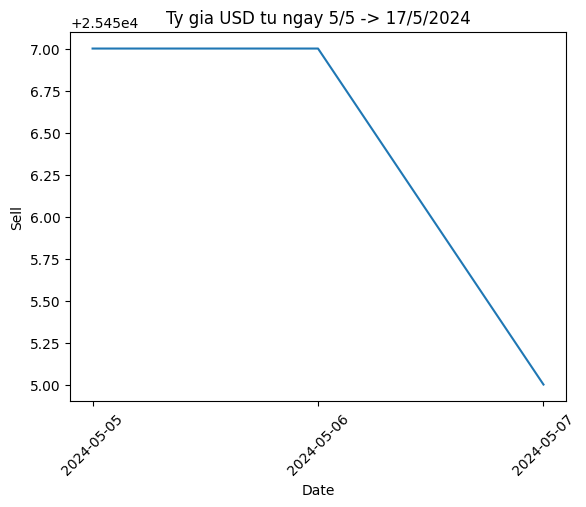

In [42]:
sns.lineplot(data=usd_rate, x='Date', y="Sell")
plt.title("Ty gia USD tu ngay 5/5 -> 17/5/2024")
plt.xticks(rotation = 45)
plt.show()

1. data types:
    - int/float
    - string
    - boolean
    - NoneType
    - datetime
2. conditional statement: if/elif/else
3. loop: for loop, while loop, break, continue
4. data structures: list, tuple, set & dictionary; list/set/dict comprehension
5. function: user-defined function, lambda function

1. Series/DataFrame trong pandas
2. Filter, select hang/cot với DataFrame
3. Các thao tác cơ bản với DataFrame
    - concat
    - merge/join
    - missing values
    - duplications
    - groupby
    - agg
    - apply
4. Dataviz: seaborn, plotly